In [4]:
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [5]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


In [15]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

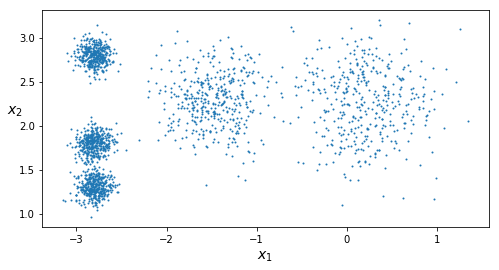

In [16]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [17]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [18]:
kmeans.cluster_centers_


array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [29]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [226]:
from matplotlib.image import imread
import os
image = imread(os.path.join(".","foxes.jpg"))
image.shape

(608, 800, 3)

In [247]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=5).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [248]:
kmeans.cluster_centers_

array([[198.3573884 , 107.89150665,  25.47664882],
       [122.23837737, 145.07104064, 183.62286109],
       [253.34772556, 252.92094823, 252.57042374],
       [115.02546907,  86.8674118 ,  26.54795763],
       [223.90531102, 149.9000603 ,  86.28233343]])

In [249]:
segmented_img[0][0]

array([122.23837737, 145.07104064, 183.62286109])

In [242]:
print(X.shape)

(486400, 3)


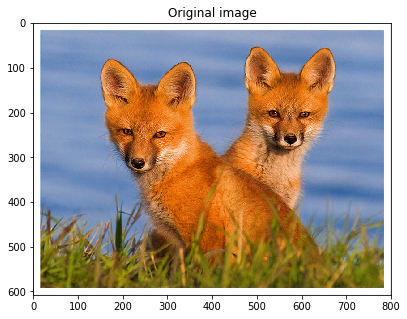

In [238]:
plt.figure(figsize=(10,5))
plt.imshow(image.astype(np.uint8))
plt.title("Original image")
plt.show()

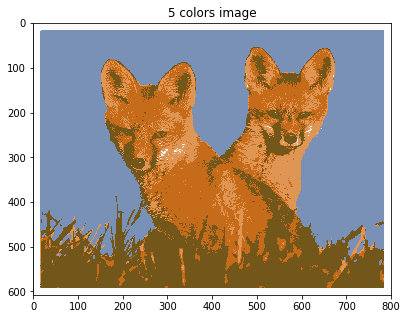

In [232]:
plt.figure(figsize=(10,5))
plt.imshow(segmented_img.astype(np.uint8))
plt.title("5 colors image")
plt.show()

In [250]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [251]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/home/yagel/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yagel/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [252]:
log_reg.score(X_test, y_test)


0.9444444444444444

In [273]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans2", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression()),
])
pipeline.fit(X_train, y_train)

/home/yagel/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yagel/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('kmeans2',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [274]:
pipeline.score(X_test, y_test)

0.9711111111111111

In [276]:
pipeline['kmeans2'].labels_

array([ 9, 13, 29, ..., 13,  6, 48], dtype=int32)

In [ ]:
kmeans2.cluster_centers_[1]

In [280]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
param_grid

{'kmeans__n_clusters': range(2, 100)}

In [303]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

/home/yagel/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yagel/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [304]:
log_reg.score(X_test, y_test)

0.8044444444444444

In [302]:
y_test[12]

9

In [310]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)

In [311]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [343]:
X_digits_dist[1]

array([43.19470237, 40.92936354, 48.79199823, 29.09266605, 35.79108459,
       51.70861255, 46.81683632, 23.55785862, 37.99133205, 50.87576671,
       42.5216319 , 44.61555026, 39.8606677 , 43.94549293, 57.05209558,
       54.12439376, 37.51526317, 36.9621353 , 45.13157128, 26.50471656,
       34.4862412 , 39.51104551, 38.49238886, 52.01307802, 44.9651619 ,
       45.57529416, 35.35533906, 43.51818755, 45.83812593, 52.57605887,
       44.12748811, 43.54551112, 54.30157601, 57.10359008, 42.79170013,
       46.7876738 , 39.03591578, 50.19322663, 41.64957473, 35.27018528,
       33.7792768 , 43.30127019, 37.97316948, 47.78176954, 48.23096574,
       40.59016167, 51.88856971, 19.44513881, 55.28623609, 35.45544588])

In [344]:
kmeans.labels_`A

array([24, 47, 11, ..., 47, 10, 30], dtype=int32)

In [334]:
X_train.shape

(1347, 64)

In [335]:
np.argmin(X_digits_dist, axis=0).shape

(50,)

In [336]:
y_train[representative_digit_idx]

array([5, 1, 6, 3, 8, 1, 0, 2, 9, 4, 7, 5, 9, 1, 4, 1, 8, 3, 7, 2, 3, 7,
       8, 6, 0, 5, 2, 5, 7, 6, 1, 7, 4, 9, 1, 1, 5, 6, 8, 3, 3, 5, 8, 1,
       0, 9, 6, 2, 4, 8])

In [339]:
y_train[274]

5

In [366]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)


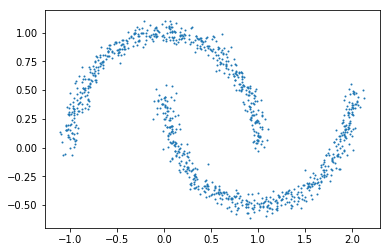

In [372]:
plt.scatter(X[:,0],X[:,1],s=1)
plt.show()

In [391]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [392]:
dbscan.labels_[:10]

array([ 0, -1,  1,  2,  1,  2,  3,  1,  2,  4])

In [393]:
dbscan.components_

array([[ 0.89189412, -0.51947226],
       [-0.76835694,  0.58238513],
       [ 0.80191   ,  0.54964558],
       ...,
       [ 0.15089959,  0.91693801],
       [ 1.69964884, -0.23895208],
       [-0.87549879,  0.31085528]])

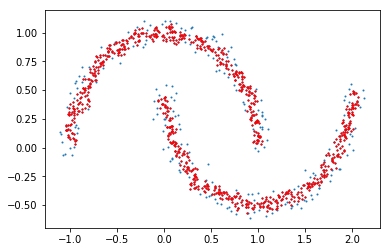

In [394]:
plt.scatter(X[:,0],X[:,1],s=1)
plt.scatter(dbscan.components_[:,0],dbscan.components_[:,1],s=1,marker="X",color="r")
plt.show()

In [457]:
'''
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    cores = dbscan.components_
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
'''    

In [601]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    cores = dbscan.components_
    
    plt.scatter(cores[:, 0], cores[:, 1],
                marker='o', s=size)
    #plt.scatter([0.5,1],[0.5,1],s=100,c=[1,2])
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask]) 

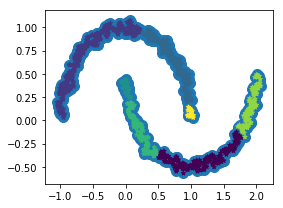

In [602]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.show()

In [603]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [604]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)
knn.predict_proba(X_new)

array([[0.  , 0.9 , 0.  , 0.  , 0.1 , 0.  , 0.  ],
       [0.  , 0.04, 0.  , 0.56, 0.4 , 0.  , 0.  ],
       [0.32, 0.  , 0.28, 0.  , 0.  , 0.  , 0.4 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ]])

In [620]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  3,  6, -1])

In [621]:
dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

array([[1],
       [3],
       [6],
       [5]])

In [612]:

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

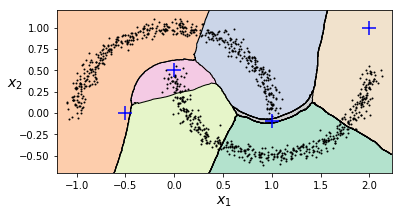

In [613]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [70]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=10, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [71]:
gm.weights_

array([0.08662647, 0.10459717, 0.07511563, 0.10941604, 0.10359232,
       0.12488432, 0.09644889, 0.11750019, 0.09178981, 0.09002915])

In [72]:
gm.means_

array([[ 1.65772267, -0.2370742 ],
       [-0.5459892 ,  0.81643813],
       [ 0.94956627,  0.23450867],
       [ 0.54005749, -0.3673179 ],
       [-0.92557344,  0.31672673],
       [ 0.12375646,  0.96372491],
       [ 1.14881515, -0.46547582],
       [ 0.10010663,  0.1456514 ],
       [ 0.7224047 ,  0.67817887],
       [ 1.94546942,  0.22271227]])

In [73]:
gm.covariances_

array([[[ 0.02083388,  0.01672194],
        [ 0.01672194,  0.01770917]],

       [[ 0.03459192,  0.02195892],
        [ 0.02195892,  0.01778928]],

       [[ 0.00287366, -0.00442286],
        [-0.00442286,  0.023433  ]],

       [[ 0.04262104, -0.01886909],
        [-0.01886909,  0.01277486]],

       [[ 0.00696599,  0.01235642],
        [ 0.01235642,  0.03712186]],

       [[ 0.06066962, -0.00589285],
        [-0.00589285,  0.00324705]],

       [[ 0.03934904,  0.00588144],
        [ 0.00588144,  0.00261245]],

       [[ 0.00727963, -0.01283791],
        [-0.01283791,  0.04043045]],

       [[ 0.01932478, -0.01796023],
        [-0.01796023,  0.02121239]],

       [[ 0.00417798,  0.00701338],
        [ 0.00701338,  0.03273606]]])

In [74]:
gm.converged_

True

In [75]:
gm.n_iter_

10

In [76]:
gm.predict(X)

array([9, 8, 9, 7, 0, 4, 4, 4, 5, 3, 2, 4, 7, 6, 7, 5, 9, 4, 2, 5, 8, 8,
       0, 7, 5, 5, 1, 8, 9, 3, 3, 5, 9, 7, 3, 0, 4, 3, 8, 6, 0, 1, 2, 1,
       4, 0, 4, 3, 6, 4, 9, 4, 4, 6, 6, 4, 3, 5, 1, 0, 7, 6, 4, 7, 9, 2,
       0, 6, 5, 3, 3, 8, 7, 8, 8, 2, 5, 2, 1, 9, 5, 7, 4, 7, 8, 5, 2, 3,
       8, 9, 6, 7, 4, 3, 1, 3, 1, 1, 0, 9, 2, 5, 9, 1, 8, 6, 2, 2, 1, 4,
       0, 6, 3, 4, 1, 8, 0, 5, 8, 4, 4, 1, 1, 1, 2, 0, 7, 7, 6, 5, 3, 2,
       8, 3, 5, 2, 3, 2, 2, 8, 6, 6, 3, 6, 7, 6, 1, 1, 1, 7, 0, 1, 3, 4,
       9, 9, 3, 9, 9, 8, 7, 9, 7, 7, 2, 6, 8, 2, 1, 7, 3, 4, 9, 0, 5, 4,
       0, 0, 8, 5, 8, 5, 7, 6, 4, 2, 1, 7, 9, 0, 7, 4, 7, 0, 2, 8, 4, 6,
       2, 1, 3, 9, 4, 4, 7, 2, 0, 9, 0, 7, 8, 2, 6, 1, 2, 9, 5, 7, 2, 6,
       8, 6, 4, 2, 1, 6, 5, 5, 8, 1, 1, 4, 3, 4, 5, 5, 5, 9, 4, 3, 7, 2,
       9, 5, 7, 9, 8, 0, 9, 5, 5, 6, 3, 1, 5, 5, 0, 1, 7, 4, 4, 4, 3, 6,
       9, 6, 7, 9, 7, 0, 1, 8, 5, 9, 3, 8, 9, 5, 8, 3, 2, 9, 9, 0, 0, 5,
       5, 9, 9, 3, 7, 4, 3, 6, 9, 2, 2, 4, 8, 6, 1,

In [77]:
gm.predict_proba(X)

array([[3.15212388e-006, 4.02723986e-289, 4.97556898e-134, ...,
        7.98015047e-276, 1.68585336e-060, 9.99996848e-001],
       [3.94478108e-145, 3.53077292e-064, 4.57963613e-004, ...,
        2.08881536e-046, 9.99540967e-001, 1.28022343e-138],
       [2.34783226e-003, 7.51901214e-318, 1.61389352e-108, ...,
        6.86713818e-240, 2.23048650e-039, 9.97652168e-001],
       ...,
       [1.36909234e-013, 3.68000330e-286, 5.65790012e-008, ...,
        6.00160999e-028, 1.57426194e-045, 4.60653711e-068],
       [8.03359021e-164, 1.05237111e-068, 5.55783812e-091, ...,
        9.99971297e-001, 2.38148699e-073, 8.74577428e-285],
       [9.62064970e-145, 4.69175612e-081, 7.42959375e-078, ...,
        9.99943464e-001, 9.59964739e-069, 4.37430927e-259]])

In [78]:
 X_new, y_new = gm.sample(100)

In [79]:
X_new

array([[ 1.64414472e+00, -2.97111330e-01],
       [ 1.67922329e+00, -2.21549008e-01],
       [ 1.67044651e+00, -3.24516268e-01],
       [ 1.76217157e+00, -1.71414506e-01],
       [ 1.48220041e+00, -3.64753566e-01],
       [ 1.59501972e+00, -3.96053176e-01],
       [ 1.74925414e+00, -2.39771460e-01],
       [ 1.51260029e+00, -3.28035175e-01],
       [ 1.40149233e+00, -4.73695830e-01],
       [ 1.68586326e+00, -1.92079010e-01],
       [-9.41424553e-01,  6.63448060e-01],
       [-3.78081796e-01,  9.50618837e-01],
       [-5.85464868e-01,  7.49056464e-01],
       [-4.93878295e-01,  8.56155052e-01],
       [-3.10445244e-01,  1.03426141e+00],
       [-4.05242019e-01,  9.90007878e-01],
       [-5.62692415e-01,  7.78814476e-01],
       [-4.75448498e-01,  7.74741226e-01],
       [-5.37196451e-01,  7.32266118e-01],
       [ 9.71207781e-01, -5.96902239e-03],
       [ 9.06897929e-01,  2.52744108e-01],
       [ 9.67696754e-01,  2.25263279e-01],
       [ 1.01024999e+00,  6.25871494e-02],
       [ 9.

In [80]:
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

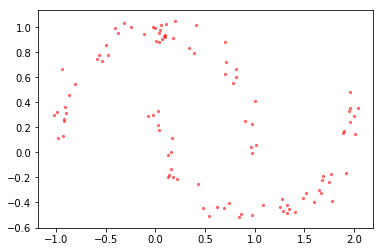

In [81]:
import matplotlib.pyplot as plt
plt.scatter(X_new[:,0],X_new[:,1],s=5,c='r',alpha=0.5)
plt.show()